# Setting up langsmith

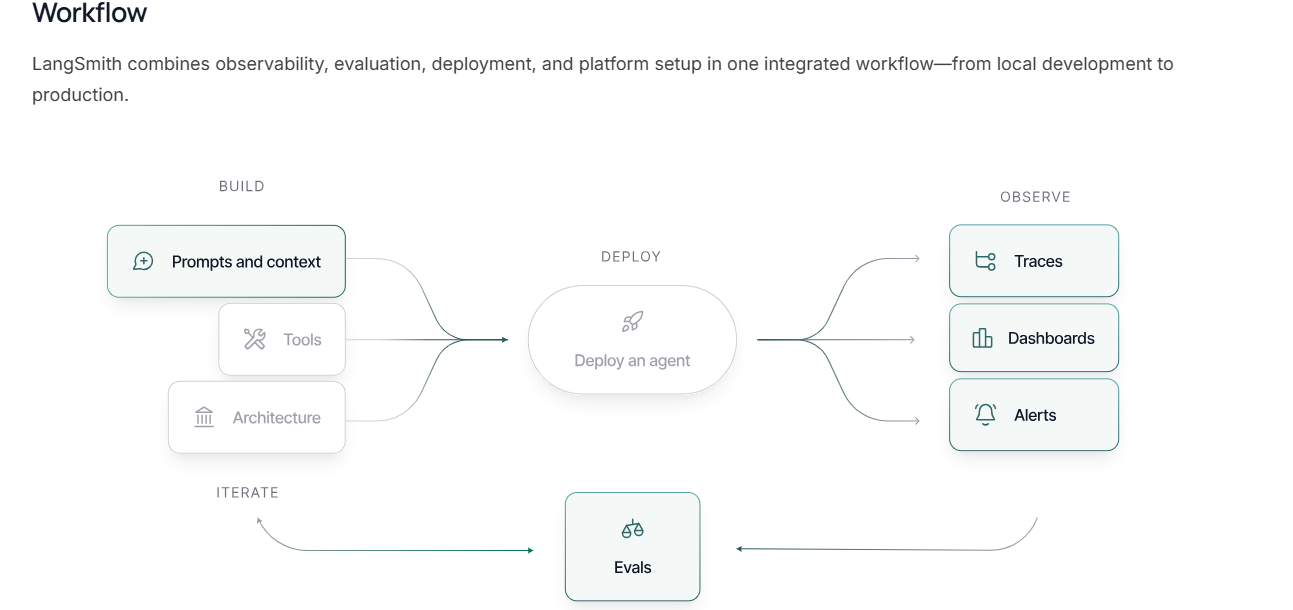

In [ ]:
import os
from getpass import getpass
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
print(f"API Key: {OPENAI_API_KEY}")

# must enter API key
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY") or \
    getpass("Enter LangSmith API Key: ")

LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
print(f"LANGCHAIN_API_KEY Key: {LANGCHAIN_API_KEY}")

# below should not be changed
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
# you can change this as preferred
os.environ["LANGCHAIN_PROJECT"] = "Rakeshgarapati-class2-demo"


In [ ]:
# ...existing code...
import os
from getpass import getpass
from dotenv import load_dotenv

# ensure required packages are installed in your venv:
# python -m pip install --upgrade langchain langchain-openai langsmith

load_dotenv()

# Ensure LANGCHAIN API key is set (prompt if missing)
if not os.getenv("LANGCHAIN_API_KEY"):
    os.environ["LANGCHAIN_API_KEY"] = getpass("Enter LangSmith API Key: ")
else:
    os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")

# Ensure OpenAI key is set
if not os.getenv("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass("Enter OpenAI API Key: ")
else:
    os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

# Tracing config required by LangSmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = os.getenv("LANGCHAIN_ENDPOINT", "https://api.smith.langchain.com")
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT", "Rakeshgarapati-langchain-course-langsmith-openai")




In [ ]:
import os
from getpass import getpass
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=1.0, model="gpt-4o-mini")
llm.invoke("tell a joke on movies")


# Tracing Non-LangChain Code
LangSmith can trace functions that are not part of LangChain. We need to add the @traceable decorator. Let's try this for a few simple functions.

In [ ]:
from langsmith import traceable
import random
import time


@traceable
def generate_random_number():
    return random.randint(0, 100)

@traceable
def generate_string_delay(input_str: str):
    number = random.randint(1, 5)
    time.sleep(number)
    return f"{input_str} ({number})"

@traceable
def random_error():
    number = random.randint(0, 1)
    if number == 0:
        raise ValueError("Random error")
    else:
        return "No error"


In [ ]:
from tqdm.auto import tqdm

for _ in tqdm(range(10)):
    generate_random_number()
    generate_string_delay("Hello")
    try:
        random_error()
    except ValueError:
        pass


In [ ]:
from langsmith import traceable

@traceable(name="Chitchat Maker")
def error_generation_function(question: str):
    delay = random.randint(0, 3)
    time.sleep(delay)
    number = random.randint(0, 1)
    if number == 0:
        raise ValueError("Random error")
    else:
        return "I'm great how are you?"
